In [1]:
# https://www.youtube.com/watch?v=wQ8BIBpya2k


import tensorflow as tf

2023-08-25 07:50:32.858467: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 07:50:33.133077: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 07:50:33.136755: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 07:50:34.277065: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras import layers

In [5]:
tf.__version__

'2.13.0'

In [6]:
minst = tf.keras.datasets.mnist

In [7]:
minst

<module 'keras.api._v2.keras.datasets.mnist' from '/home/krissroot/.local/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [8]:
(x_train, y_train), (x_test, y_test) = minst.load_data()

11490434/11490434 [==============================] - 18s 2us/step


In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
import matplotlib.pyplot as plt


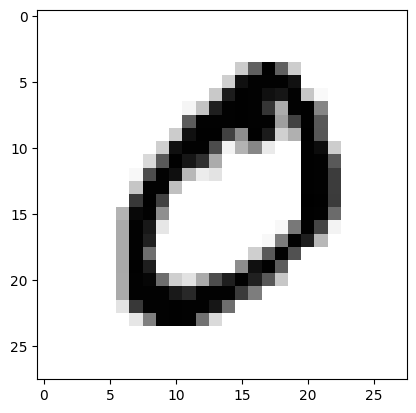

In [15]:
plt.imshow(x_train[1], cmap = plt.cm.binary)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

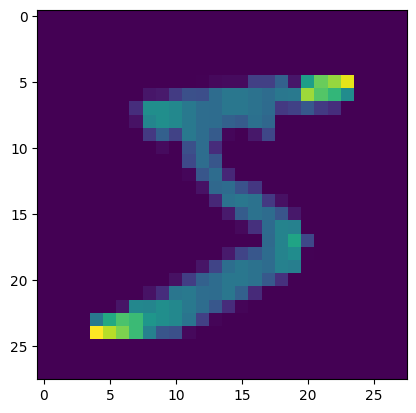

In [21]:
plt.imshow(x_train[0])

In [22]:
model = tf.keras.models.Sequential()

In [23]:
model.add(tf.keras.layers.Flatten())

In [24]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', 
              metrics = 'accuracy'
             )

model.fit(x_train, y_train)

2023-08-25 08:32:46.326199: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 13s 6ms/step - loss: 0.3224 - accuracy: 0.9109


In [25]:
vad_loss, val_ac = model.evaluate(x_test, y_test)

2023-08-25 08:34:33.081861: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 4ms/step - loss: 0.1843 - accuracy: 0.9465


In [26]:
vad_loss, val_ac

(0.18425330519676208, 0.9465000033378601)

In [27]:
model.save('thisismytfmodedl.model')

INFO:tensorflow:Assets written to: thisismytfmodedl.model/assets


INFO:tensorflow:Assets written to: thisismytfmodedl.model/assets


In [29]:
newm = tf.keras.models.load_model('thisismytfmodedl.model')

In [30]:
newm

In [32]:
prediction = newm.predict([x_test])

  1/313 [..............................] - ETA: 18s

2023-08-25 08:38:56.156569: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 4ms/step


In [33]:
import  numpy as np

In [34]:

print(np.argmax(prediction[0]))

7


In [35]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)